# Data Wrangling

## Overview

* Collecting data
* Cleaning data
* Transforming data
* Using transformed data to get new information

### 1. Read dataset  and examine dataframe for duplicates (ID)

Importing pandas and statistics modules

In [89]:
import pandas as pd
import statistics
from functools import reduce
import operator

Reading personality and scores datasets into dataframes.

In [90]:
departments = pd.read_csv('data/departments.csv', delimiter=';')
scores = pd.read_csv('data/personality_scores.csv', delimiter=';')

Checking for deuplicates, keeping the first value and removing the second duplicate value and more if there any. Also removing all columns that only contain null values.

In [91]:
new_department = departments.drop_duplicates(subset='ID', keep='first').dropna(axis=1)
new_department.head()

,ID,Department
0,0,Data
1,1,Data
2,2,Data
3,3,Data
4,4,Data


In [92]:
new_scores = scores.drop_duplicates(subset='ID', keep='first').dropna(axis=1)
new_scores.head()

,ID,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
0,0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)",...,"(3, 5)","(3, 5)","(4, 3)","(5, 5)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
1,1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)",...,"(3, 5)","(3, 1)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)"
2,2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)",...,"(3, 5)","(3, 5)","(4, 1)","(5, 3)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
3,3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)",...,"(3, 1)","(3, 5)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)"
4,4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)",...,"(3, 5)","(3, 5)","(4, 5)","(5, 5)","(1, 3)","(2, 3)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"


In [93]:
scores.shape

(1555, 70)

In [94]:
new_scores.shape

(1555, 51)

In [95]:
departments.shape

(1555, 21)

In [96]:
new_department.shape

(1555, 2)

Setting the ID column as the index for both dataframes.

In [97]:
new_scores = new_scores.set_index('ID')
new_department = new_department.set_index('ID')

In [98]:
new_scores.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 5)","(4, 3)","(5, 5)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 1)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)"
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 1)","(5, 3)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,"(3, 1)","(3, 5)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)"
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 5)","(5, 5)","(1, 3)","(2, 3)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"


In [99]:
new_scores.shape

(1555, 50)

In [100]:
new_department.head()

,Department
ID,
0,Data
1,Data
2,Data
3,Data
4,Data


In [101]:
new_department.shape

(1555, 1)

### 2. Write functions that will convert the answer on each personality test question and calculate the total scores for each of the subscales.

A function to convert the data to the user's answer.

In [102]:
def extrac(df):
    a = df.str[4]
    return a

In [103]:
scores_num = new_scores.apply(extrac, axis=1)
scores_num = scores_num.astype(int)
scores_num.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
ID,,,,,,,,,,,,,,,,,,,,,
0,5,5,5,5,3,3,3,5,5,3,...,5,5,3,5,3,5,5,3,1,3
1,5,5,5,5,5,3,5,5,5,3,...,5,1,1,5,5,5,5,5,3,3
2,5,3,3,5,5,5,5,5,5,1,...,5,5,1,3,3,5,5,3,1,3
3,5,5,3,5,5,3,3,3,3,3,...,1,5,1,5,5,5,5,5,1,1
4,3,5,3,3,3,3,3,3,5,1,...,5,5,5,5,3,3,5,3,1,3


A function to convert the data to the subscale number.

In [104]:
def extrac_subscale(df):
    a = df.str[1]
    return a

In [105]:
subscale_num = new_scores.apply(extrac_subscale, axis=1)
subscale_num = subscale_num.astype(int)
subscale_num.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
ID,,,,,,,,,,,,,,,,,,,,,
0,3,4,3,5,2,5,2,2,5,1,...,3,3,4,5,1,2,2,1,5,4
1,3,4,3,5,2,5,2,2,5,1,...,3,3,4,5,1,2,2,1,5,4
2,3,4,3,5,2,5,2,2,5,1,...,3,3,4,5,1,2,2,1,5,4
3,3,4,3,5,2,5,2,2,5,1,...,3,3,4,5,1,2,2,1,5,4
4,3,4,3,5,2,5,2,2,5,1,...,3,3,4,5,1,2,2,1,5,4


In [106]:
new_scores.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 5)","(4, 3)","(5, 5)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 1)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)"
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 1)","(5, 3)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,"(3, 1)","(3, 5)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)"
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 5)","(5, 5)","(1, 3)","(2, 3)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"


A function to calculate the total scores for each of the subscales and adding them to the dataframe.

In [107]:
personality = ['Extraversion','Agreeableness','Conscientiousness','Emotional_Stability','Openness']
subscales = pd.DataFrame()

In [108]:
def subtot(sub, val):
    a = int(sub[1])
    b = int(sub[4])
    if (val == 'Extraversion') and (a == 1):
        return b
    elif (val == 'Agreeableness') and (a == 2):
        return b
    elif (val == 'Conscientiousness') and (a == 3):
        return b
    elif (val == 'Emotional_Stability') and (a == 4):
        return b
    elif (val == 'Openness') and (a == 5):
        return b
    else:
        return 0

In [109]:
def subscale_total(df, trait):
    pers = []
    for j in range(len(df)):
        pers.append(trait)
    s_tot = list(map(subtot, df, pers))
    total = reduce(operator.add, s_tot)
    return total

In [110]:
for i in personality:
    person = []
    for j in range(len(new_scores)):
        person.append(i)
    subscales[i] = list(map(subscale_total, new_scores.values, person))

In [111]:
subscales.shape

(1555, 5)

In [112]:
subscales.head(10)

,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness
0,30,40,48,36,42
1,42,46,46,40,42
2,28,40,40,38,42
3,30,38,38,40,38
4,28,34,46,38,36
5,48,46,42,46,36
6,38,44,50,36,42
7,30,48,48,42,42
8,40,46,48,44,48
9,32,44,36,18,42


In [113]:
new_scores.tail(10)

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
ID,,,,,,,,,,,,,,,,,,,,,
1545,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 3)","(5, 5)","(2, 3)","(2, 3)","(5, 3)","(1, 1)",...,"(3, 1)","(3, 3)","(4, 3)","(5, 3)","(1, 3)","(2, 5)","(2, 1)","(1, 5)","(5, 1)","(4, 1)"
1546,"(3, 5)","(4, 3)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 5)","(5, 3)","(1, 3)",...,"(3, 3)","(3, 5)","(4, 1)","(5, 5)","(1, 3)","(2, 5)","(2, 3)","(1, 3)","(5, 1)","(4, 5)"
1547,"(3, 5)","(4, 5)","(3, 1)","(5, 5)","(2, 5)","(5, 5)","(2, 1)","(2, 5)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 1)","(5, 3)","(1, 5)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 1)"
1548,"(3, 3)","(4, 3)","(3, 5)","(5, 5)","(2, 5)","(5, 5)","(2, 3)","(2, 5)","(5, 3)","(1, 3)",...,"(3, 3)","(3, 3)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 1)"
1549,"(3, 3)","(4, 1)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 1)",...,"(3, 3)","(3, 5)","(4, 3)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)"
1550,"(3, 5)","(4, 5)","(3, 1)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 1)","(3, 5)","(4, 1)","(5, 3)","(1, 5)","(2, 5)","(2, 3)","(1, 1)","(5, 1)","(4, 5)"
1551,"(3, 3)","(4, 5)","(3, 5)","(5, 3)","(2, 5)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 5)",...,"(3, 3)","(3, 3)","(4, 1)","(5, 3)","(1, 3)","(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 3)"
1552,"(3, 5)","(4, 3)","(3, 5)","(5, 5)","(2, 5)","(5, 5)","(2, 3)","(2, 3)","(5, 5)","(1, 3)",...,"(3, 3)","(3, 5)","(4, 5)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)"
1553,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 5)",...,"(3, 5)","(3, 5)","(4, 1)","(5, 5)","(1, 5)","(2, 3)","(2, 3)","(1, 1)","(5, 1)","(4, 3)"


### 3. Create a function(s) that take in the subscale total, for each subscale create a new column called '{subscale_name}_interpretation'  and applies the labels 'low', 'medium', or 'high'.

Getting column names and storing them in a list for easy use in the following lines of code to come.

Create a variable name for the strings mean and std as they will be used more than once in the code.

In [114]:
cols = list(subscales.columns)
cols

['Extraversion',
 'Agreeableness',
 'Conscientiousness',
 'Emotional_Stability',
 'Openness']

In [115]:
meann = '_mean'
std = '_std'

Calculating the mean for the subscale total values from the list of column names created above at the same time creating a variable for each using the same items in the list adding the mean (meann) variable created above to classify the variable contains the mean value for that particular subscale, i.e. Extraversion_mean

In [116]:
for i in cols:
    for j in subscales[i]:
        name = i + meann
        exec('%s = %f' % (name, subscales[i].mean()))

Calculating the standard deviation for the subscale total values from the list of column names created above at the same time creating a variable for each using the same items in the list adding the standard deviation (std) variable created above to classify the variable contains the standard deviation value for that particular subscale, i.e. Extraversion_std

In [117]:
for i in cols:
    for j in subscales[i]:
        name = i + std
        exec('%s = %f' % (name, statistics.stdev(subscales[i])))

Using the formula in the scores.md to calculate the low and high of each subscale columns and storing the results in a dataframe named markers.

In [118]:
markers = pd.DataFrame()
for i in cols:
    high = {i: [eval(f'%s{meann}' % i) + eval(f'%s{std}' % i) / 2,  eval(f'%s{meann}' % i) - eval(f'%s{std}' % i) / 2]}
    df = pd.DataFrame.from_dict(high, orient='index', columns=['High','Low'])
    df.index.rename('Personality', inplace=True)
    markers = pd.concat([markers,df])
markers

,High,Low
Personality,,
Extraversion,34.891184,26.814282
Agreeableness,44.853085,39.507043
Conscientiousness,45.111567,39.186825
Emotional_Stability,39.630996,32.605660
Openness,42.821156,37.351192


Swapping the columns and the index using the transpose function.

In [119]:
markers = markers.transpose()
markers

Personality,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness
High,34.891184,44.853085,45.111567,39.630996,42.821156
Low,26.814282,39.507043,39.186825,32.605660,37.351192


Using the markers dataframe to determine whether the for each subscale scored a high, medium or low, and joining the results to the subscales dataframe with their own columns.

In [120]:
def interpretation(df):
    if df >= markers[i].max():
        return('High')
    elif df <= markers[i].min():
        return('Low')
    else:
        return('Medium')

In [121]:
for i in cols:
    subscales[f'{i}_interpretation'] = list(map(interpretation, subscales[i]))

In [122]:
subscales.head()

,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Extraversion_interpretation,Agreeableness_interpretation,Conscientiousness_interpretation,Emotional_Stability_interpretation,Openness_interpretation
0,30,40,48,36,42,Medium,Medium,High,Medium,Medium
1,42,46,46,40,42,High,High,High,High,Medium
2,28,40,40,38,42,Medium,Medium,Medium,Medium,Medium
3,30,38,38,40,38,Medium,Low,Low,High,Medium
4,28,34,46,38,36,Medium,Low,High,Medium,Low


### 4. Merge the department dataframe with the personality dataframe

Joining th department, personality score, and subscales dataframes together creating a new dataframe with all the data collected and transformed thus far.

In [123]:
department_scores = pd.concat([new_department, new_scores, subscales], axis=1)
department_scores.head()

,Department,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],...,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Extraversion_interpretation,Agreeableness_interpretation,Conscientiousness_interpretation,Emotional_Stability_interpretation,Openness_interpretation
ID,,,,,,,,,,,,,,,,,,,,,
0,Data,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)",...,30,40,48,36,42,Medium,Medium,High,Medium,Medium
1,Data,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)",...,42,46,46,40,42,High,High,High,High,Medium
2,Data,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)",...,28,40,40,38,42,Medium,Medium,Medium,Medium,Medium
3,Data,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)",...,30,38,38,40,38,Medium,Low,Low,High,Medium
4,Data,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)",...,28,34,46,38,36,Medium,Low,High,Medium,Low


Checking that if the newly created dataframe has the same amount of rows as the deparment dataframe

In [124]:
len(new_department) == len(department_scores)

True

### 5. Create histograms of personality scores by department. Department names may need to be cleaned

Checking if the department names are all correct.

In [125]:
department_scores['Department'].unique()

array(['Data', 'Web Dev', 'Copywriting', 'Design', 'Strategy', 'Web dev'],
      dtype=object)

A function that transform all strings passed to it to up case strings.

In [126]:
def upcase(df):
    return df.upper()

Applying the upcase function to the Department column and creating a new pandas Series named new_department.

In [127]:
new_department = new_department['Department'].apply(upcase)
new_department.head()

ID
0    DATA
1    DATA
2    DATA
3    DATA
4    DATA
Name: Department, dtype: object

Transforming the new_department into a dataframe.

In [128]:
new_department = pd.DataFrame(new_department)
new_department['Department'].unique()

array(['DATA', 'WEB DEV', 'COPYWRITING', 'DESIGN', 'STRATEGY'],
      dtype=object)

Applying the new_department dataframe column 'Department' to the department_scores, overriding the existing column of department_scores 'Department'.

In [129]:
department_scores['Department'] = new_department['Department'].apply(upcase)
department_scores['Department'].head()

ID
0    DATA
1    DATA
2    DATA
3    DATA
4    DATA
Name: Department, dtype: object

Creating a new dataframe for the data that will be visualized.

In [130]:
cols.append('Department')

In [131]:
df_plot = pd.DataFrame()
for i in cols:
    df_plot[i] = department_scores[i]
df_plot.head()

,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Department
ID,,,,,,
0,30,40,48,36,42,DATA
1,42,46,46,40,42,DATA
2,28,40,40,38,42,DATA
3,30,38,38,40,38,DATA
4,28,34,46,38,36,DATA


* Plotting for Data

In [132]:
data = df_plot[df_plot.Department == 'DATA']
data = pd.DataFrame(data)
data.head()

,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Department
ID,,,,,,
0,30,40,48,36,42,DATA
1,42,46,46,40,42,DATA
2,28,40,40,38,42,DATA
3,30,38,38,40,38,DATA
4,28,34,46,38,36,DATA


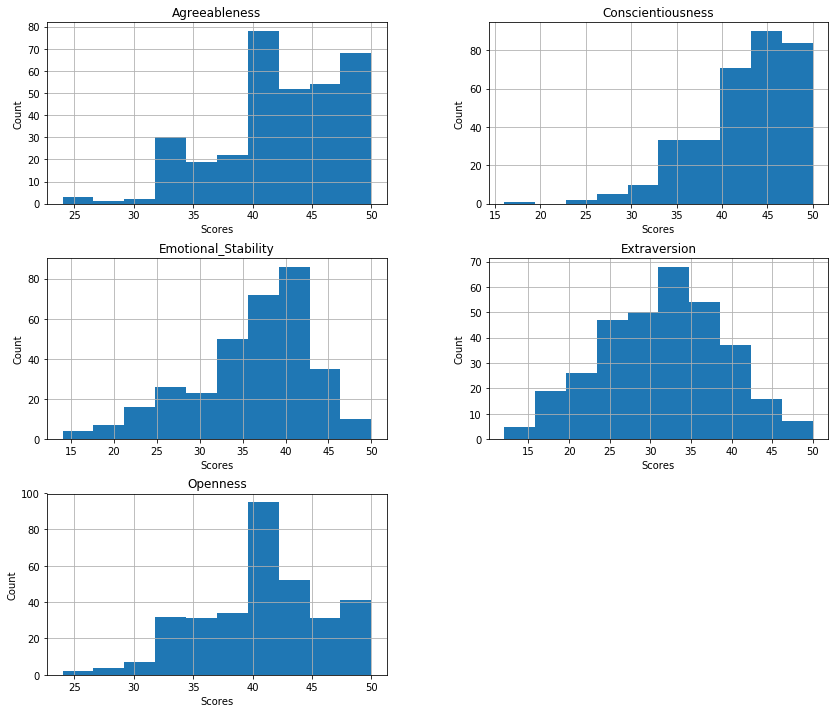

In [133]:
data_hist = data.hist(figsize=(14,12))

for i in data_hist.flatten():
    i.set_ylabel('Count')
    i.set_xlabel('Scores')

* Plotting for Copywriting

In [134]:
cp = df_plot[df_plot.Department == 'COPYWRITING']
cp = pd.DataFrame(cp)
cp.head()

,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Department
ID,,,,,,
199,12,44,48,32,38,COPYWRITING
200,34,46,40,40,44,COPYWRITING
201,40,46,34,32,32,COPYWRITING
202,24,38,48,40,46,COPYWRITING
203,36,40,42,44,42,COPYWRITING


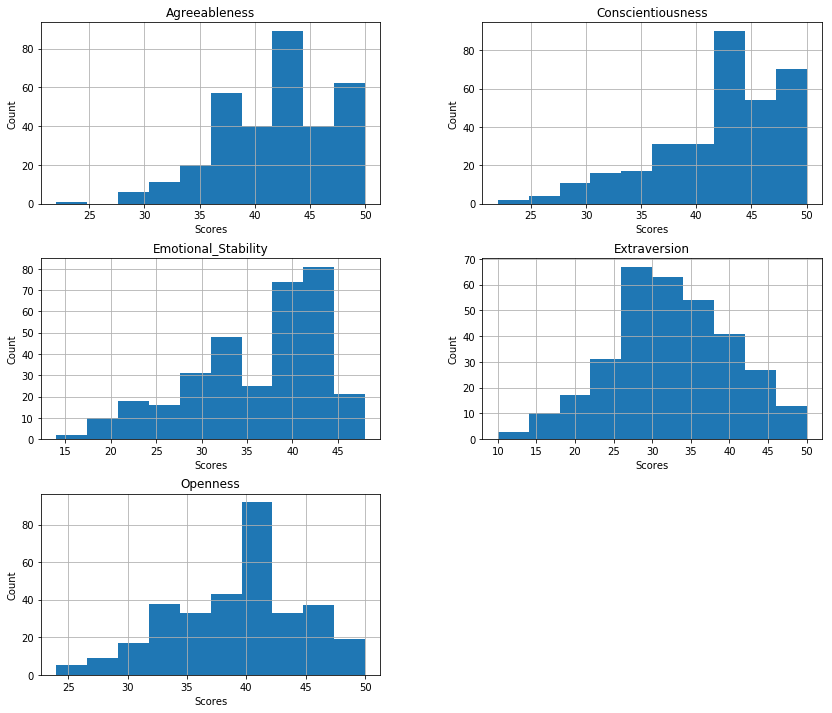

In [135]:
cp_hist = cp.hist(figsize=(14,12))

for i in cp_hist.flatten():
    i.set_ylabel('Count')
    i.set_xlabel('Scores')

* Plotting for Design

In [136]:
design = df_plot[df_plot.Department == 'DESIGN']
design = pd.DataFrame(design)
design.head()

,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Department
ID,,,,,,
235,36,44,48,48,46,DESIGN
236,22,42,34,30,40,DESIGN
237,32,34,46,38,34,DESIGN
238,36,40,44,32,48,DESIGN
239,24,36,46,16,34,DESIGN


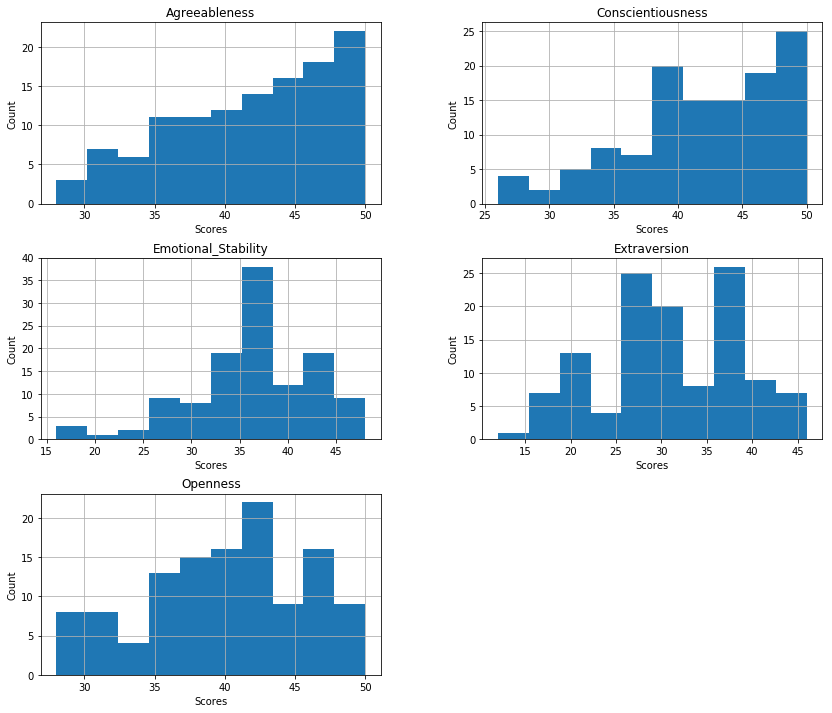

In [137]:
design_hist = design.hist(figsize=(14,12))

for i in design_hist.flatten():
    i.set_ylabel('Count')
    i.set_xlabel('Scores')

* Plotting for Strategy

In [138]:
strategy = df_plot[df_plot.Department == 'STRATEGY']
strategy = pd.DataFrame(strategy)
strategy.head()

,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Department
ID,,,,,,
355,24,44,34,32,42,STRATEGY
356,36,34,36,40,32,STRATEGY
357,34,36,30,28,38,STRATEGY
358,38,40,40,38,46,STRATEGY
359,42,44,44,32,48,STRATEGY


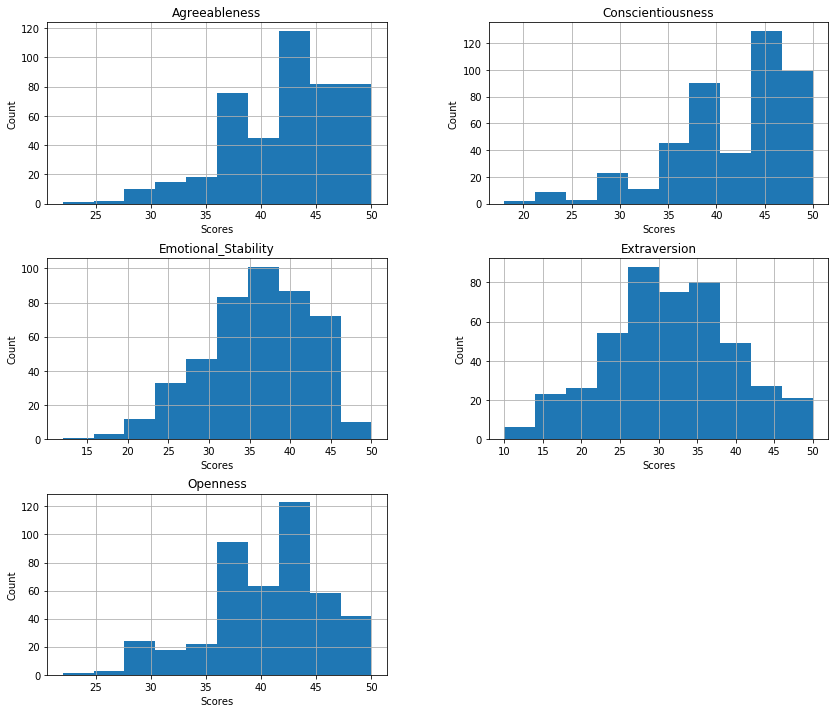

In [139]:
strategy_hist = strategy.hist(figsize=(14,12))

for i in strategy_hist.flatten():
    i.set_ylabel('Count')
    i.set_xlabel('Scores')

* Plotting for Web Dev

In [140]:
web = df_plot[df_plot.Department == 'WEB DEV']
web = pd.DataFrame(web)
web.head()

,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Department
ID,,,,,,
29,34,44,44,42,42,WEB DEV
30,42,46,42,38,42,WEB DEV
31,40,40,50,38,42,WEB DEV
32,30,36,46,42,46,WEB DEV
33,46,48,44,30,44,WEB DEV


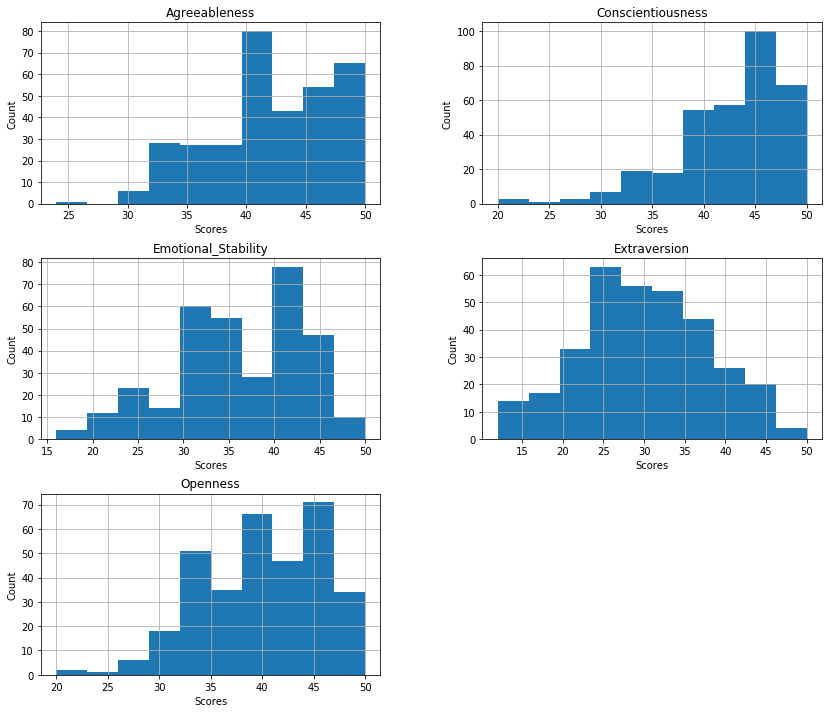

In [141]:
web_hist = web.hist(figsize=(14,12))

for i in web_hist.flatten():
    i.set_ylabel('Count')
    i.set_xlabel('Scores')

### 6. Filter the merged dataframe to get the ID numers of applicants who score 'low' on emotional stability, conscientiousness or agreeablenes. Tag these applicants with 'high_risk' in a new column

Filtering the department_scores dataframe to applicants who score 'low' on emotional stability, conscientiousness or agreeableness, into a new dataframe: df. Tagging them in a new column 'Risk' as high risk.

In [142]:
df = department_scores['Department'][(department_scores.Agreeableness_interpretation == 'Low') | (department_scores.Conscientiousness_interpretation == 'Low') | (department_scores.Emotional_Stability_interpretation == 'Low')]
df = pd.DataFrame(df)
df['Risk'] = 'high_risk'
df.head()

,Department,Risk
ID,,
3,DATA,high_risk
4,DATA,high_risk
9,DATA,high_risk
11,DATA,high_risk
12,DATA,high_risk


Concatenating the risk column from df into department_scores.

In [143]:
department_scores = pd.concat([department_scores, df['Risk']], axis=1)
department_scores.head()

,Department,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],...,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Extraversion_interpretation,Agreeableness_interpretation,Conscientiousness_interpretation,Emotional_Stability_interpretation,Openness_interpretation,Risk
ID,,,,,,,,,,,,,,,,,,,,,
0,DATA,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)",...,40,48,36,42,Medium,Medium,High,Medium,Medium,NaN
1,DATA,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)",...,46,46,40,42,High,High,High,High,Medium,NaN
2,DATA,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)",...,40,40,38,42,Medium,Medium,Medium,Medium,Medium,NaN
3,DATA,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)",...,38,38,40,38,Medium,Low,Low,High,Medium,high_risk
4,DATA,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)",...,34,46,38,36,Medium,Low,High,Medium,Low,high_risk


Changing null values to 'not_specified'.

In [144]:
department_scores.fillna('not_specified', inplace=True)
department_scores.head()

,Department,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],...,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Extraversion_interpretation,Agreeableness_interpretation,Conscientiousness_interpretation,Emotional_Stability_interpretation,Openness_interpretation,Risk
ID,,,,,,,,,,,,,,,,,,,,,
0,DATA,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)",...,40,48,36,42,Medium,Medium,High,Medium,Medium,not_specified
1,DATA,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)",...,46,46,40,42,High,High,High,High,Medium,not_specified
2,DATA,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)",...,40,40,38,42,Medium,Medium,Medium,Medium,Medium,not_specified
3,DATA,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)",...,38,38,40,38,Medium,Low,Low,High,Medium,high_risk
4,DATA,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)",...,34,46,38,36,Medium,Low,High,Medium,Low,high_risk


### 7. Create a new dataframe with a count of the number of applicants in each group ('high', 'medium', 'low') within each personailty subscale and department. Let each department be a separate column, and each personality subscale be a separate row

In [145]:
subscales['Department'] = department_scores['Department']
subscales['Group'] = 'Group'

In [146]:
new_df = pd.DataFrame()
for i in personality:
    filt = ['Department','Group', i+'_interpretation']
    mark = pd.pivot_table(subscales[filt], index=i+'_interpretation', columns='Department', aggfunc='count')
    mark['Trait'] = i
    new_df = pd.concat([new_df, mark])

new_df = new_df.reset_index().rename(columns={'index': 'Marker'}).set_index(['Trait', 'Marker'])
new_df

Group                             
Department                 COPYWRITING DATA DESIGN STRATEGY WEB DEV
Trait               Marker                                         
Extraversion        High           106  114     42      137      94
                    Low             94   97     35      147     127
                    Medium         126  118     43      165     110
Agreeableness       High           102  122     40      164     119
                    Low             95   77     38      122      89
                    Medium         129  130     42      163     123
Conscientiousness   High           124  128     44      172     120
                    Low             81   84     35      127      68
                    Medium         121  117     41      150     143
Emotional_Stability High           137  131     40      169     135
                    Low             99   99     31      136     113
                    Medium          90   99     49      144      83
Openness            High            89  124     34      157     105
                    Low            102   76     33      106     113
                    Medium         135  129     53      186     113